In [1]:
%matplotlib inline
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\Users\Jacob\OneDrive\Desktop\SQL-HEALTHCARE-PROJECT\patient_analytics_demo\healthcare_dataset.csv")

# Connect to SQLite database
conn = sqlite3.connect("patient_appointments.db")

# Load CSV into SQL table
df.to_sql("patients", conn, if_exists="replace", index=False)

# Preview
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
# Connect to SQLite
conn = sqlite3.connect("patient_appointments.db")

# Load CSV into SQL table
df.to_sql("patients", conn, if_exists="replace", index=False)

print("CSV loaded into SQLite database!")

CSV loaded into SQLite database!


In [3]:
query_total = "SELECT COUNT(*) AS total_patients FROM patients"
pd.read_sql(query_total, conn)

,total_patients
0,55500


In [4]:
query_avg_age = "SELECT AVG(Age) AS avg_age FROM patients"
pd.read_sql(query_avg_age, conn)

,avg_age
0,51.539459


In [5]:
query_hospital = """
SELECT Hospital, COUNT(*) AS total_patients
FROM patients
GROUP BY Hospital
ORDER BY total_patients DESC
"""
pd.read_sql(query_hospital, conn)

,Hospital,total_patients
0,LLC Smith,44
1,Ltd Smith,39
2,Johnson PLC,38
3,Smith Ltd,37
4,Smith PLC,36
...,...,...
39871,"Abbott, Vazquez Bautista and",1
39872,"Abbott and Thompson, Sullivan",1
39873,"Abbott Moore and Williams,",1
39874,Abbott Ltd,1


In [6]:
query_doctor = """
SELECT Doctor, COUNT(*) AS total_patients
FROM patients
GROUP BY Doctor
ORDER BY total_patients DESC
LIMIT 10
"""
pd.read_sql(query_doctor, conn)

,Doctor,total_patients
0,Michael Smith,27
1,Robert Smith,22
2,John Smith,22
3,Michael Johnson,20
4,James Smith,20
5,Robert Johnson,19
6,David Smith,19
7,Michael Williams,18
8,Matthew Smith,17
9,John Johnson,17


In [7]:
query_insurance = """
SELECT "Insurance Provider", AVG("Billing Amount") AS avg_billing
FROM patients
GROUP BY "Insurance Provider"
ORDER BY avg_billing DESC
"""
pd.read_sql(query_insurance, conn)

,Insurance Provider,avg_billing
0,Medicare,25615.990508
1,Blue Cross,25613.011503
2,Aetna,25553.294506
3,Cigna,25525.766314
4,UnitedHealthcare,25389.172390


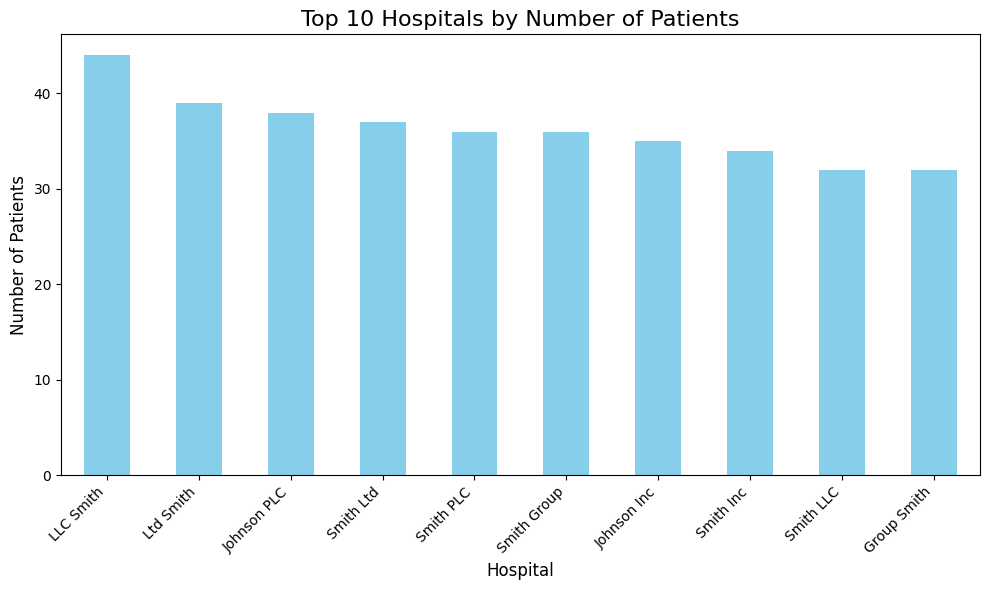

In [18]:
# Top 10 hospitals by patient count
top_hospitals = df['Hospital'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_hospitals.plot(kind='bar', color='skyblue')
plt.title("Top 10 Hospitals by Number of Patients", fontsize=16)
plt.xlabel("Hospital", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

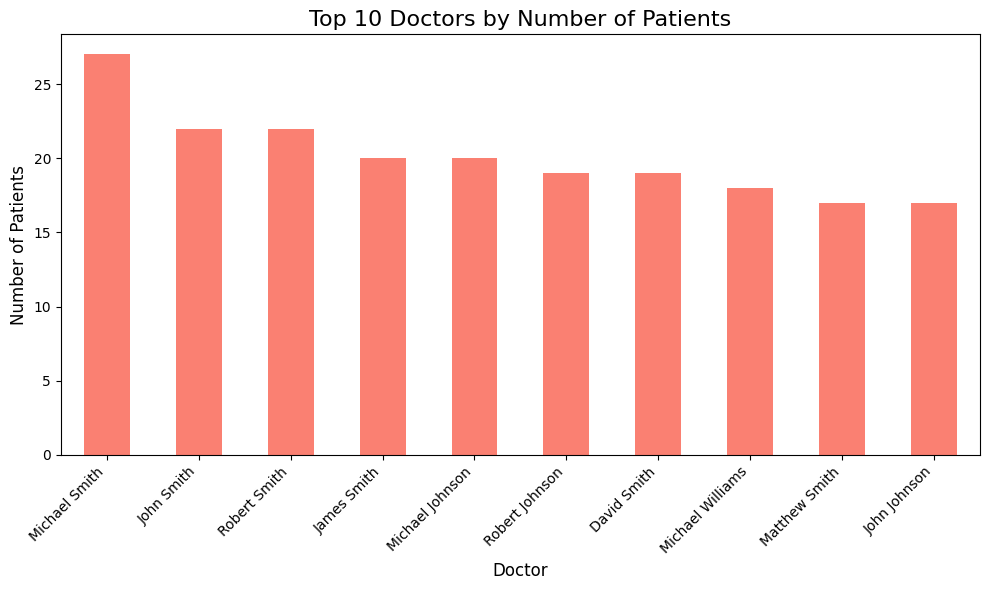

In [15]:
# Count patients per doctor (top 10)
doctor_counts = df['Doctor'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(10,6))
doctor_counts.plot(kind='bar', color='salmon')
plt.title("Top 10 Doctors by Number of Patients", fontsize=16)
plt.xlabel("Doctor", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

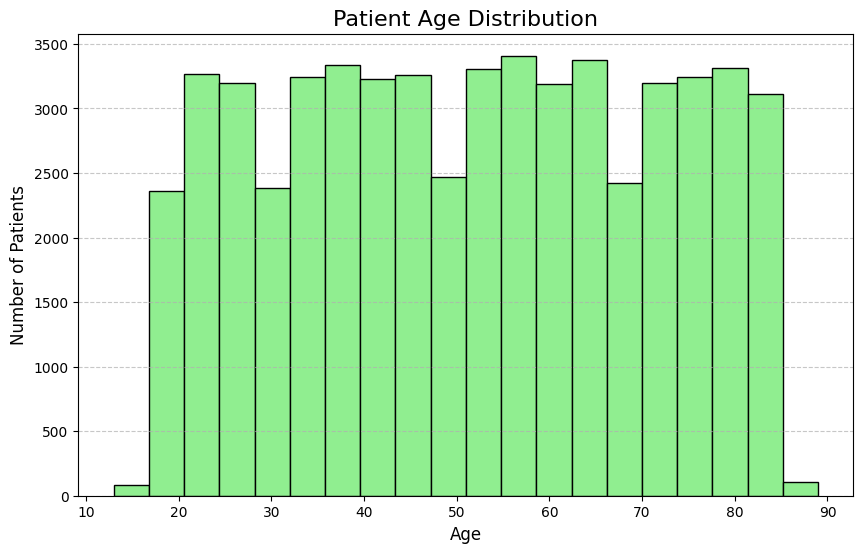

In [14]:
plt.figure(figsize=(10,6))
df['Age'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title("Patient Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

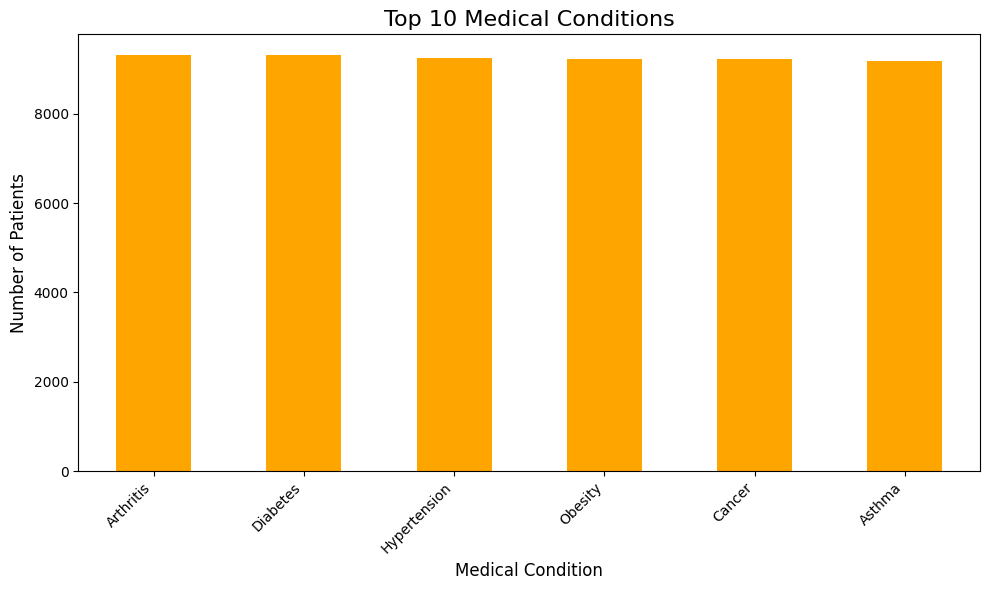

In [13]:
top_conditions = df['Medical Condition'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_conditions.plot(kind='bar', color='orange')
plt.title("Top 10 Medical Conditions", fontsize=16)
plt.xlabel("Medical Condition", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Healthcare Dashboard Demo

### Total Patients
Shows total number of patients in the dataset.

### Average Age
Displays average age of all patients.

### Patients per Hospital
Shows number of patients grouped by hospital.

### Patients per Doctor
Top 10 doctors with the most patients.

### Average Billing per Insurance Provider
Average treatment cost for each insurance company.

### Patient Age Distribution
Histogram showing age distribution.

### Top Medical Conditions
Most common medical conditions among patients.